### keypoints
Calculate :
- Divergence
- U and V transport
- Vorticity
- Strain

learn :
- plt.pcolormesh
- plt.contourf
- geomap

## Analysis of velocity gradient quantities in the surface ocean of LLC4320 

[LLC4320](https://online.kitp.ucsb.edu/online/blayers18/menemenlis/) is one of the highest resolution simulations of the global ocean. 

The data for the variables at the surface ocean are saved on google cloud at https://catalog.pangeo.io/browse/master/ocean/LLC4320/. 

In [2]:
!pip install cmocean

In [7]:
# Load some useful modules 
import numpy as np
import xarray as xr
import xrft
from xmitgcm import llcreader
from matplotlib import pyplot as plt
import cmocean.cm as cm

%matplotlib inline

In [8]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml")

In [9]:
# Get variables from catalog
sst = cat.LLC4320_SST.to_dask()
sss = cat.LLC4320_SSS.to_dask()
ssh = cat.LLC4320_SSH.to_dask()
u = cat.LLC4320_SSU.to_dask()
v = cat.LLC4320_SSV.to_dask()


In [10]:
sst

<xarray.Dataset>
Dimensions:  (time: 9030, face: 13, j: 4320, i: 4320)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
Data variables:
    SST      (time, face, j, i) float32 dask.array<chunksize=(1, 1, 4320, 4320), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      Created by calling `open_mdsdataset(llc_method='smallchunks...
    source:       MITgcm
    title:        netCDF wrapper of MITgcm MDS binary data

#### Model grid 

The full ocean is split into 13 tiles, with each tile having size 4320X4320. The simulations output is saved for every hour for 9030 hours (376.25 days). 

The data can be played around directly on the tiles, or [xmitgcm](https://xmitgcm.readthedocs.io/en/latest/) helper function `llcreader.llcmodel.faces_dataset_to_latlon()` can be used to transform to a stitched together global lat-lon grid (leaving out the Arctic).  


In [11]:
ds = xr.merge([sst, sss,ssh, u, v])

ds = llcreader.llcmodel.faces_dataset_to_latlon(ds, metric_vector_pairs=[])

coords = cat.LLC4320_grid.to_dask().reset_coords() # grid data

coords = llcreader.llcmodel.faces_dataset_to_latlon(coords)

In [12]:
coords

<xarray.Dataset>
Dimensions:  (face: 13, i: 17280, i_g: 17280, j: 12960, j_g: 12960, k_p1: 2,
              time: 9030)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * k_p1     (k_p1) int64 0 1
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
Data variables: (12/30)
    CS       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    Depth    (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    PHrefC   float32 15.4
    PHrefF   (k_p1) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    SN       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    ...       ...
    rAw      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    rAz      (j_g, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(1, 4320), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(1, 4320), meta=np.ndarray>

In [13]:
# Get data on a single face 
# face means different places (total 13)
# ds_face = xr.merge([ssh.sel(face=1), sst.sel(face=1), sss.sel(face=1), 
#                u.sel(face=1), v.sel(face=1)])
# ds_face = xr.merge([ssh, sst, sss, 
               # u, v])
    
# Get coordiantes from the catalog
# coords_face = cat.LLC4320_grid.to_dask()

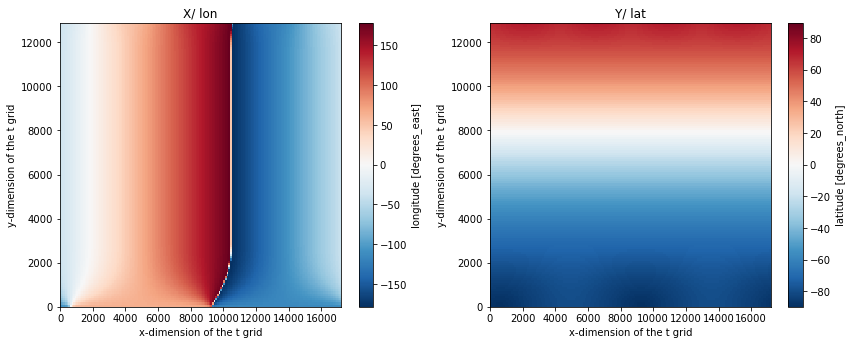

In [15]:
plt.figure(figsize=(12,9))
# show the relation between i,j and geo-coordinates.
plt.subplot(221)
ds.XC.coarsen(i=100, j=100, boundary='trim').mean().plot()
plt.title('X/ lon')

plt.subplot(222)
ds.YC.coarsen(i=100, j=100, boundary='trim').mean().plot()
plt.title('Y/ lat')

plt.tight_layout()

Text(0.5, 1.0, 'Sea Surface Height')

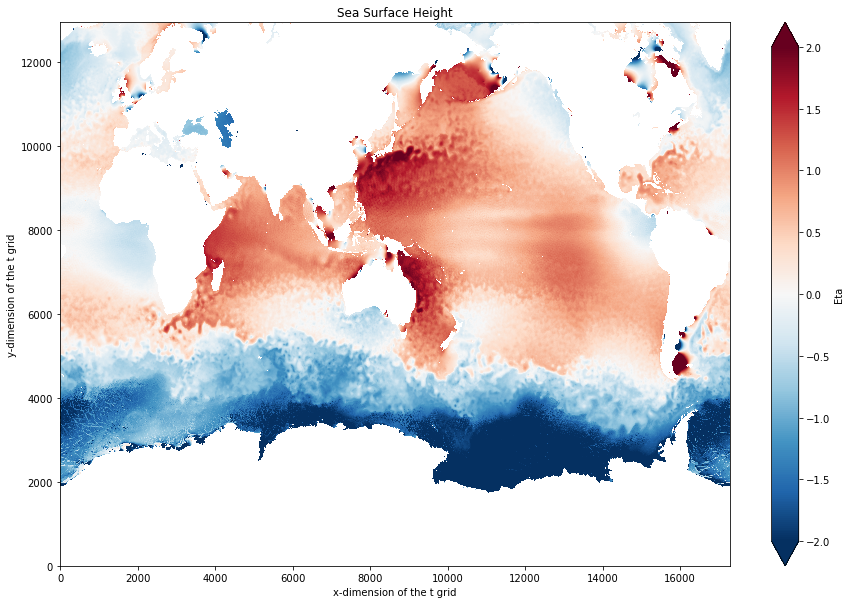

In [74]:
ds.Eta.isel(time=-1).plot(vmin=-2,aspect=1.5, size=10)
plt.title('Sea Surface Height')

Text(0.5, 1.0, 'Sea Surface Temperature')

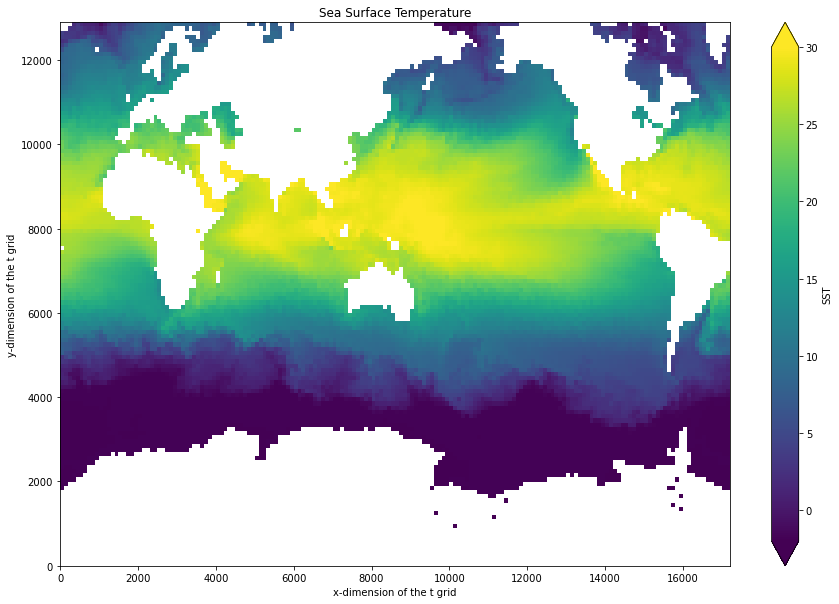

In [75]:
ds.SST.isel(time=-1).coarsen(i=100, j=100, boundary='trim').mean().plot(vmin=-2, vmax=30,aspect=1.5, size=10)
plt.title('Sea Surface Temperature')
# plt.tight_layout()

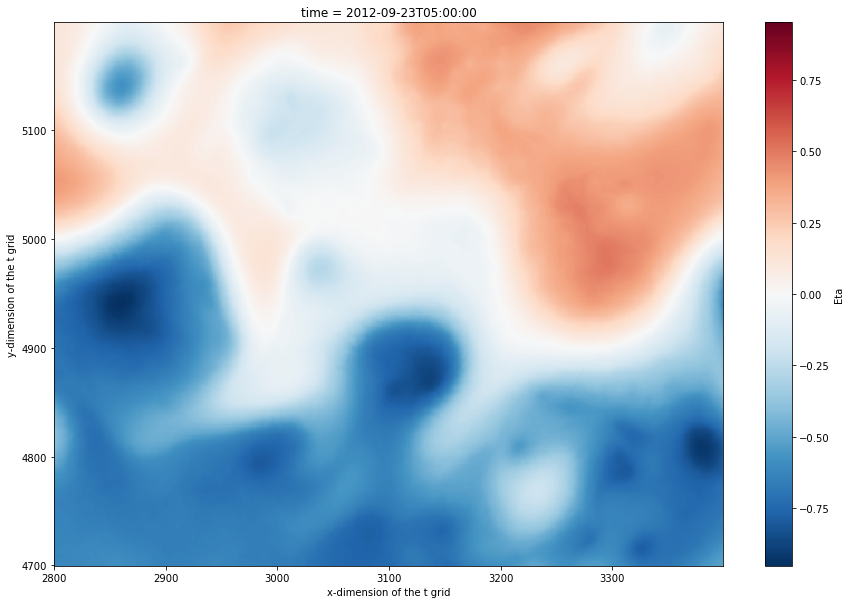

In [11]:
ds.Eta.isel(time=-1,i=slice(2800, 3400,1),j=slice(4700,5200,1)).plot(aspect=1.5, size=10)

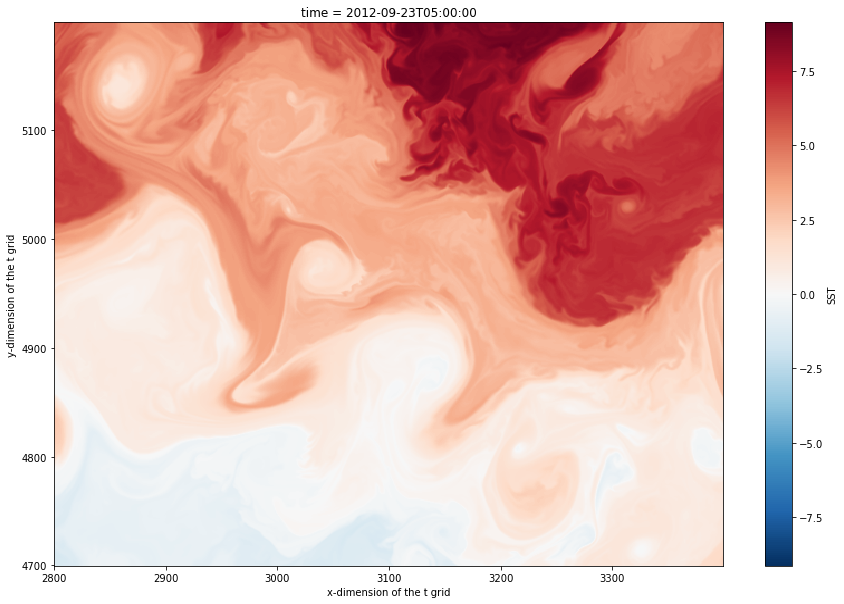

In [80]:
ds.SST.isel(time=-1,i=slice(2800, 3400,1),j=slice(4700,5200,1)).plot(aspect=1.5, size=10)

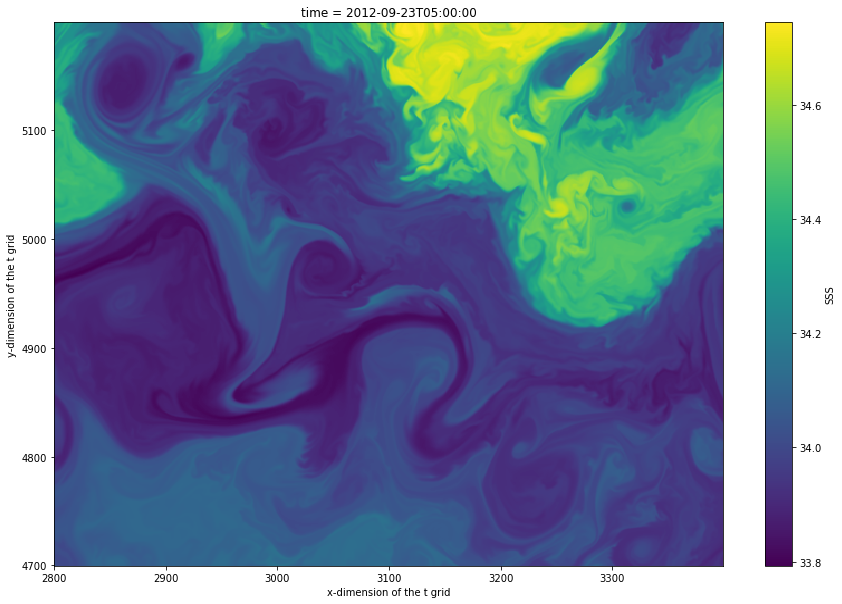

In [79]:
ds.SSS.isel(time=-1,i=slice(2800, 3400,1),j=slice(4700,5200,1)).plot(aspect=1.5, size=10)

In [83]:
ds.U

<xarray.DataArray 'U' (time: 9030, j: 12960, i_g: 17280)>
dask.array<concatenate, shape=(9030, 12960, 17280), dtype=float32, chunksize=(1, 4320, 4320), chunktype=numpy.ndarray>
Coordinates:
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279

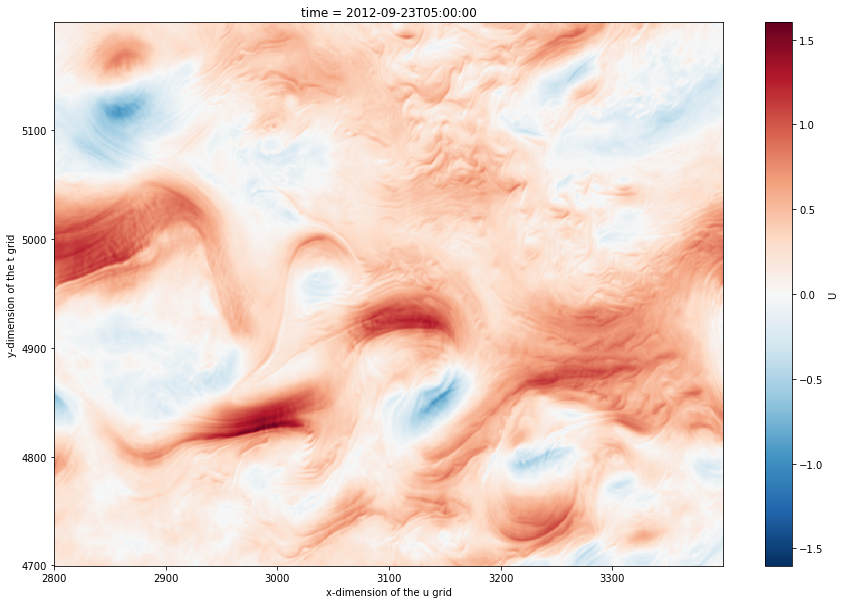

In [84]:
ds.U.isel(time=-1,i_g=slice(2800, 3400,1),j=slice(4700,5200,1)).plot(aspect=1.5, size=10)

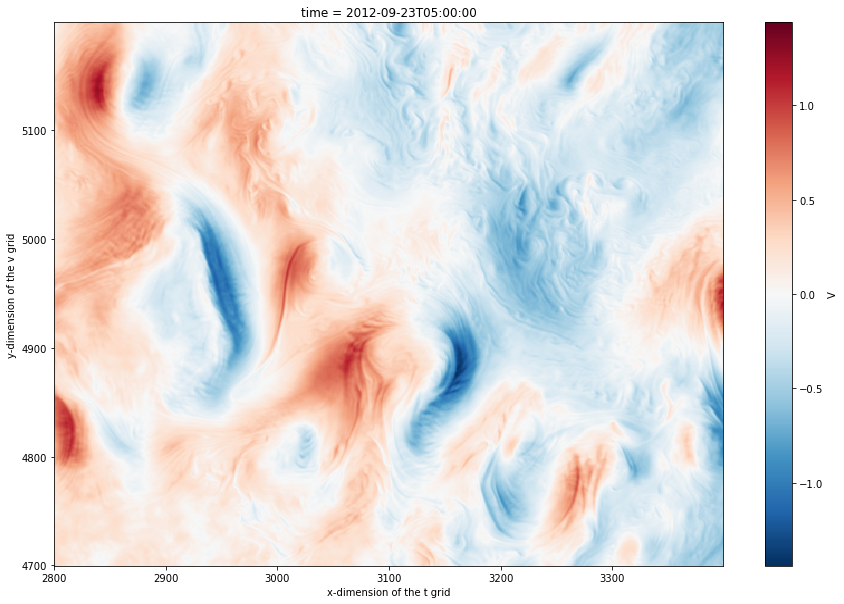

In [86]:
ds.V.isel(time=-1,i=slice(2800, 3400,1),j_g=slice(4700,5200,1)).plot(aspect=1.5, size=10)

### Calc quantities with gradients

To understand the nature of the small scale flows we often consider the statistics of the **gradient quantities**. 

Gradients can be computed and the quantities moved around to the correct grid points using [xgcm](https://xgcm.readthedocs.io/en/latest/xgcm-examples/02_mitgcm.html).

In [16]:
import xgcm
grid = xgcm.Grid(coords.drop(['k', 'k_p1']), periodic=None) # 这里drop表示不要一些参数了.

In [17]:
grid

<xgcm.Grid>
T Axis (not periodic, boundary=None):
  * center   time
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center

In [18]:
# Compute the gradients (this will most likely fail)(bit of slow due to many faces)

u_transport = ds.U * coords.dyG 
v_transport = ds.V * coords.dxG 

# Divergence
div_uv = (grid.diff(u_transport, 'X', boundary='extend') + grid.diff(v_transport, 'Y', boundary='extend')) / coords.rA

# Vorticity
zeta = (-grid.diff(ds.U * coords.dxC, 'Y', boundary='extend') + grid.diff(ds.V * coords.dyC, 'X', boundary='extend'))/coords.rAz
# zeta = grid.interp(grid.interp(zeta, 'X', boundary='extend'), 'Y', boundary='extend')

# Strain
strain1 = (grid.diff(ds.U * coords.dyG, 'X', boundary='extend') - grid.diff(ds.V * coords.dxG, 'Y',boundary='extend')) / coords.rA
strain2 = (grid.diff(ds.U * coords.dxC, 'Y', boundary='extend') + grid.diff(ds.V * coords.dyC, 'X', boundary='extend'))/coords.rAz
strain2 = grid.interp(grid.interp(strain2, 'X', boundary='extend'), 'Y', boundary='extend')
strain = (strain1**2 + strain2**2)**0.5

In [19]:
strain

<xarray.DataArray (time: 9030, j: 12960, i: 17280)>
dask.array<pow, shape=(9030, 12960, 17280), dtype=float32, chunksize=(1, 4319, 4320), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00

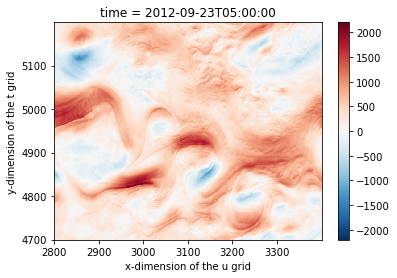

In [88]:
u_transport.isel(time=-1,i_g=slice(2800, 3400,1),j=slice(4700,5200,1)).plot()

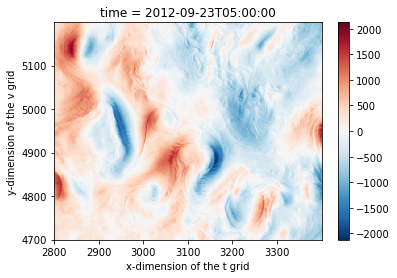

In [89]:
v_transport.isel(time=-1,i=slice(2800, 3400,1),j_g=slice(4700,5200,1)).plot()

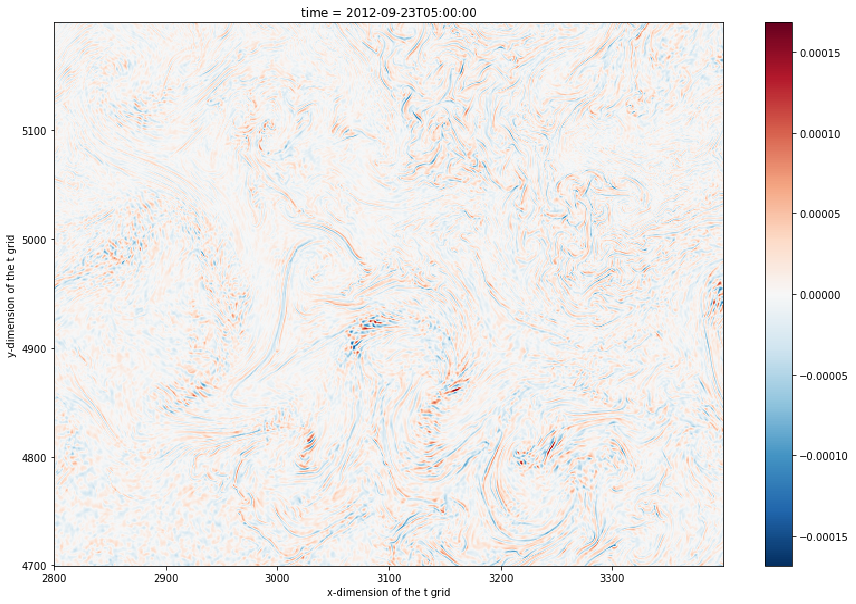

In [91]:
div_uv.isel(time=-1,i=slice(2800, 3400,1),j=slice(4700,5200,1)).plot(aspect=1.5, size=10)

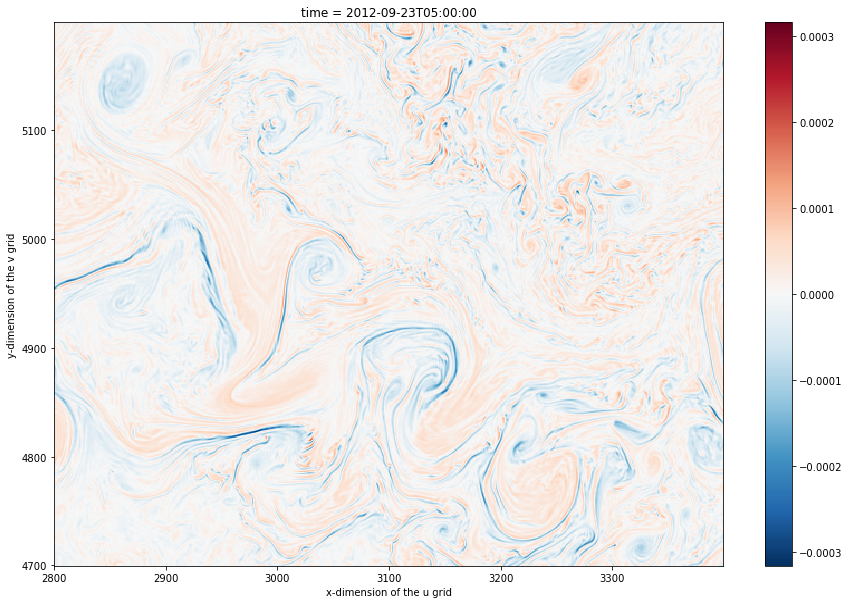

In [96]:
zeta.isel(time=-1,i_g=slice(2800, 3400,1),j_g=slice(4700,5200,1)).plot(aspect=1.5, size=10)

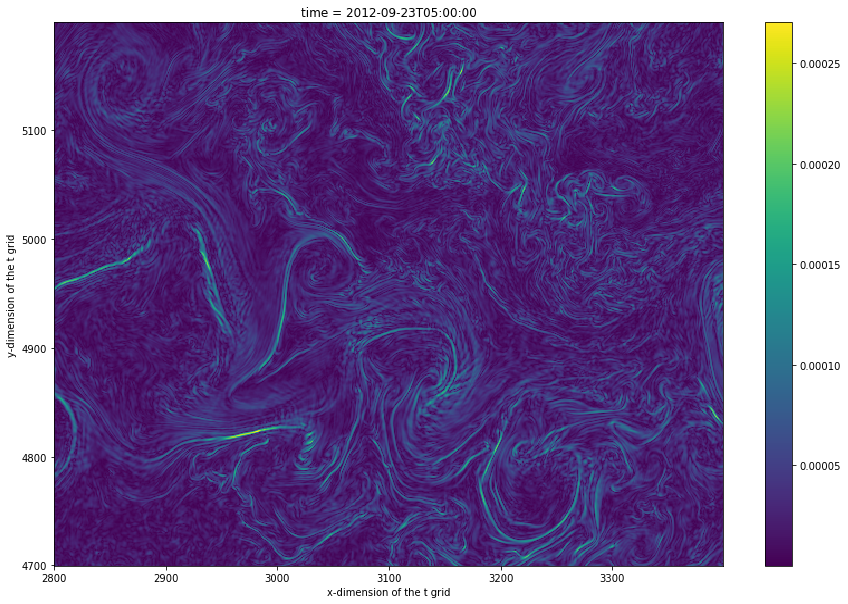

In [98]:
strain.isel(time=-1,i=slice(2800, 3400,1),j=slice(4700,5200,1)).plot(aspect=1.5, size=10)

In [104]:
coords_face

<xarray.Dataset>
Dimensions:  (face: 13, j: 4320, i: 4320, k_p1: 2, j_g: 4320, i_g: 4320,
              time: 9030)
Coordinates: (12/37)
    CS       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    Depth    (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    PHrefC   float32 ...
    PHrefF   (k_p1) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    SN       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    XC       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    ...       ...
    k_u      int64 ...
    rA       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    rAs      (face, j_g, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    rAw      (face, j, i_g) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    rAz      (face, j_g, i_g) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
Data variables:
    *empty*
Attributes:
    Conventions:  CF-1.6
    history:      Created by calling `open_mdsdataset(llc_method='smallchunks...
    source:       MITgcm
    title:        netCDF wrapper of MITgcm MDS binary data

In [20]:
f = 2*(2*np.pi/24/3600)*np.sin(coords.YC*np.pi/180)

In [21]:
lon = coords.XC.sel(j=0)
lat = coords.YC.sel(i=0)

In [22]:
lon

<xarray.DataArray 'XC' (i: 17280)>
dask.array<getitem, shape=(17280,), dtype=float32, chunksize=(4320,), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
    j        int64 0
Attributes:
    coordinate:     YC XC
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east

In [23]:
f

<xarray.DataArray 'YC' (j: 12960, i: 17280)>
dask.array<mul, shape=(12960, 17280), dtype=float32, chunksize=(4320, 4320), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959

In [37]:
# Below, we use the dask cluster. The compute is much more.
from dask_gateway import GatewayCluster
from dask.distributed import Client
cluster = GatewayCluster()
cluster.scale(5)
client = Client(cluster)
cluster

In [40]:
cluster.shutdown() 

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask_gateway/client.py:1014: RuntimeWarning: coroutine 'rpc.close_rpc' was never awaited
  self.scheduler_comm.close_rpc()


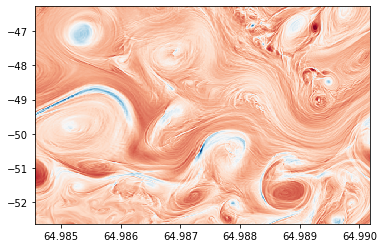

In [ ]:
plt.pcolormesh(lon.sel(i=slice(2800, 3400,1)),
               lat.sel(j=slice(4700,5200,1)),
               zeta.isel(time=slice(-24*7,-1),i_g=slice(2800, 3400,1),j_g=slice(4700,5200,1)).mean('time'),
               cmap='RdBu_r')
# 7 days
# A lot of very high frequency signal can be removed by averaging over a day! Great!

In [44]:
ds.Eta.isel(time=slice(-24,-1),i=slice(2800, 3400,1),j=slice(4700,5200,1))

<xarray.DataArray 'Eta' (time: 23, j: 500, i: 600)>
dask.array<getitem, shape=(23, 500, 600), dtype=float32, chunksize=(1, 500, 600), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int64 2800 2801 2802 2803 2804 ... 3395 3396 3397 3398 3399
  * j        (j) int64 4700 4701 4702 4703 4704 ... 5195 5196 5197 5198 5199
  * time     (time) datetime64[ns] 2012-09-22T06:00:00 ... 2012-09-23T04:00:00

In [45]:
lon.sel(i=slice(2800, 3400,1))

<xarray.DataArray 'XC' (i: 601)>
dask.array<getitem, shape=(601,), dtype=float32, chunksize=(601,), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int64 2800 2801 2802 2803 2804 ... 3396 3397 3398 3399 3400
    j        int64 0
Attributes:
    coordinate:     YC XC
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east

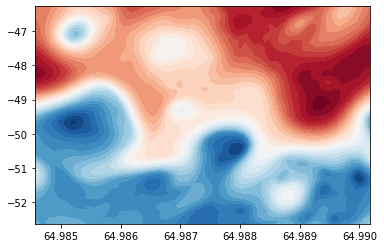

In [57]:
plt.contourf(lon.sel(i=slice(2800, 3400,1)),
               lat.sel(j=slice(4700,5200,1)),
               ds.Eta.isel(time=slice(-24,-1),i=slice(2800, 3401,1),j=slice(4700,5201,1)).mean('time'),
               cmap='RdBu_r',levels=30)
# Different fields have different roughness

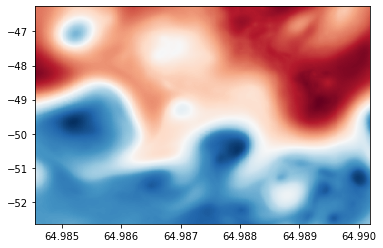

In [58]:
plt.pcolormesh(lon.sel(i=slice(2800, 3400,1)),
               lat.sel(j=slice(4700,5200,1)),
               ds.Eta.isel(time=slice(-24,-1),i=slice(2800, 3401,1),j=slice(4700,5201,1)).mean('time'),
               cmap='RdBu_r')

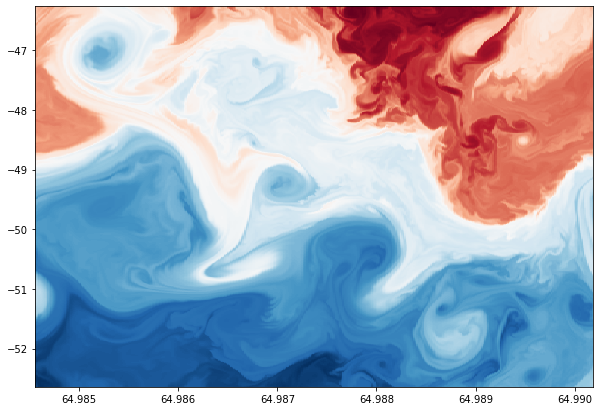

In [63]:
plt.figure(figsize=(10,7))
plt.pcolormesh(lon.sel(i=slice(2800, 3400,1)),
               lat.sel(j=slice(4700,5200,1)),
               ds.SST.isel(time=-1,i=slice(2800, 3401,1),j=slice(4700,5201,1)),
               cmap='RdBu_r')
